<a href="https://colab.research.google.com/github/Yugsolanki/AIML-Healthcare-Lab/blob/main/1_AIML_Hons_Collect%2C_Clean%2C_Integrate_and_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yug Solanki<br>
BE-4, 58<br>
21UF16526CM057<br>
[Colab Link🔗](https://colab.research.google.com/drive/16ZaNKXK8wraEMaP1SaF4p9ochsISSJw_?usp=sharing)

In [1]:
!kaggle datasets download -d amii85/pima-india

Dataset URL: https://www.kaggle.com/datasets/amii85/pima-india
License(s): unknown
pima-india.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip /content/pima-india.zip

Archive:  /content/pima-india.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Data Collection

In [4]:
df = pd.read_csv("diabetes.csv")
df_original = df

# Data Cleaning

In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Remove outliers (example: using IQR method for 'BMI')
Q1 = df_imputed['BMI'].quantile(0.25)
Q3 = df_imputed['BMI'].quantile(0.75)
IQR = Q3 - Q1
df = df_imputed[(df_imputed['BMI'] >= Q1 - 1.5*IQR) & (df_imputed['BMI'] <= Q3 + 1.5*IQR)]

# Data Transformation

In [6]:


# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Create age groups
df['AgeGroup'] = pd.cut(df_original['Age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

<ipython-input-6-449fef109982>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])
<ipython-input-6-449fef109982>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeGroup'] = pd.cut(df_original['Age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])


# Data Analysis

In [7]:
print("Data Analysis:")
print(df.describe())
print("\nCorrelation Matrix:")
# Exclude AgeGroup column as it is a categorical feature
print(df.drop(columns='AgeGroup').corr())

Data Analysis:
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.490000e+02  7.490000e+02   7.490000e+02   7.490000e+02  7.490000e+02   
mean  -2.371638e-17  1.470416e-16   2.158191e-16  -3.676039e-17  3.646393e-17   
std    1.000668e+00  1.000668e+00   1.000668e+00   1.000668e+00  1.000668e+00   
min   -1.147740e+00 -3.776059e+00  -3.871971e+00  -1.309098e+00 -7.025468e-01   
25%   -8.502807e-01 -6.856695e-01  -3.145133e-01  -1.309098e+00 -7.025468e-01   
50%   -2.553622e-01 -1.237806e-01   1.301690e-01   1.504730e-01 -3.864746e-01   
75%    6.370155e-01  6.254046e-01   5.748513e-01   7.216096e-01  4.300453e-01   
max    3.909067e+00  2.435936e+00   2.909433e+00   4.973404e+00  6.725150e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.490000e+02              7.490000e+02  7.490000e+02  749.000000  
mean  -1.185819e-16             -1.256968e-16  4.387530e-17    0.347130  
std    1.000668e+00              

# Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


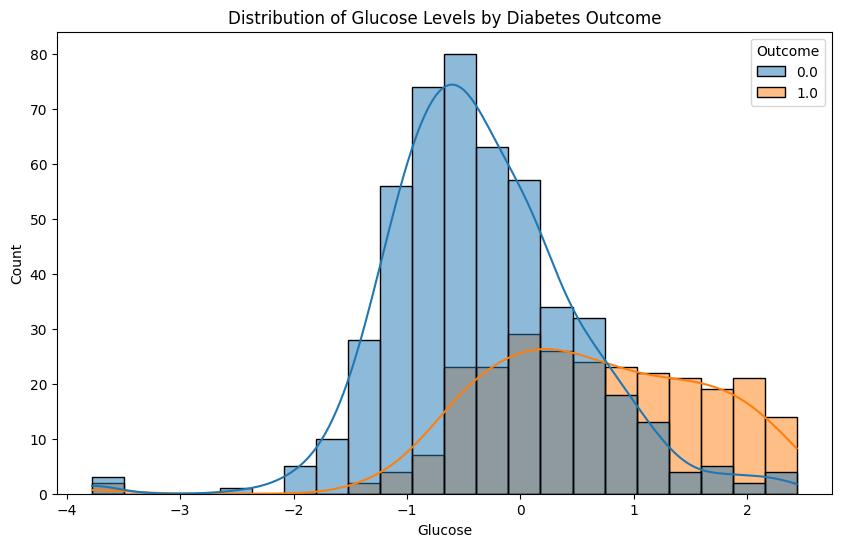

In [8]:
# Histogram of Glucose levels
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', kde=True)
plt.title('Distribution of Glucose Levels by Diabetes Outcome')
plt.show()

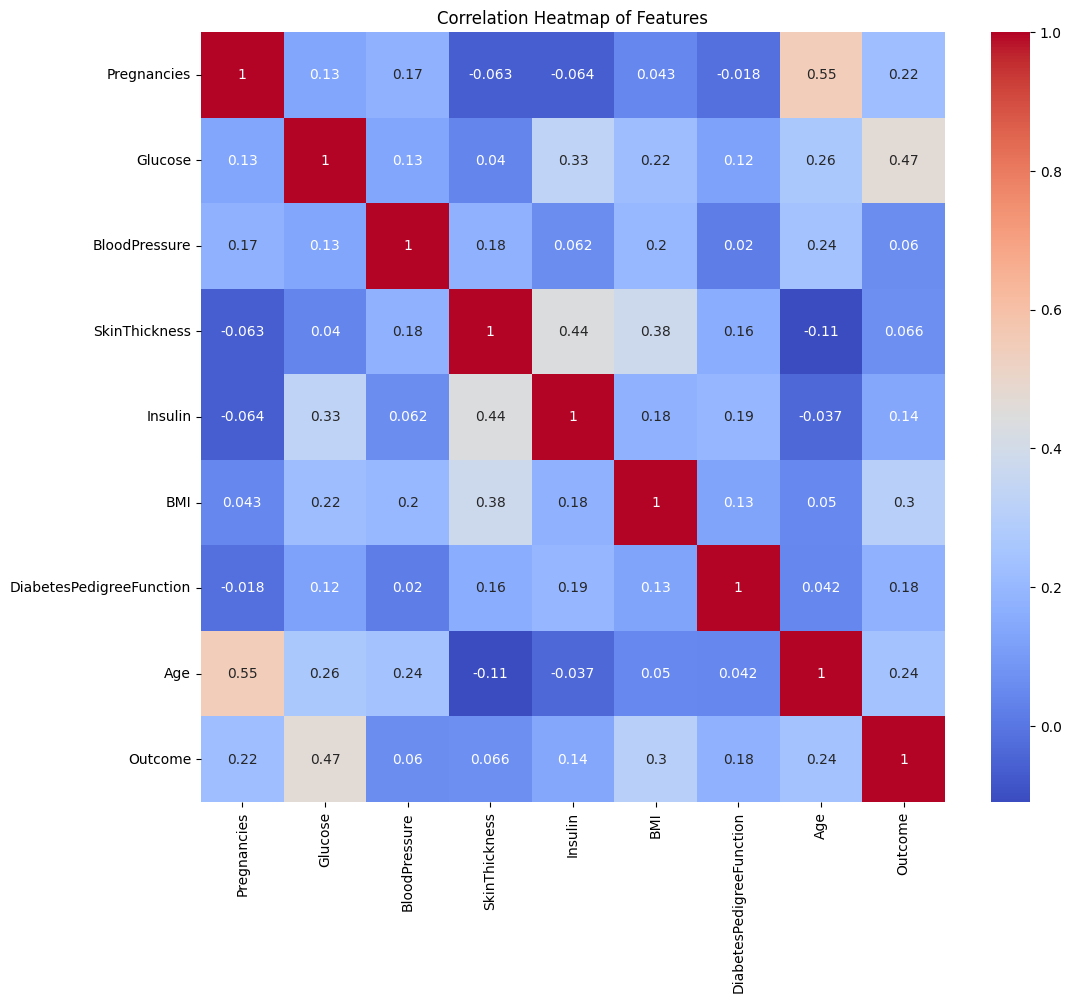

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns='AgeGroup').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


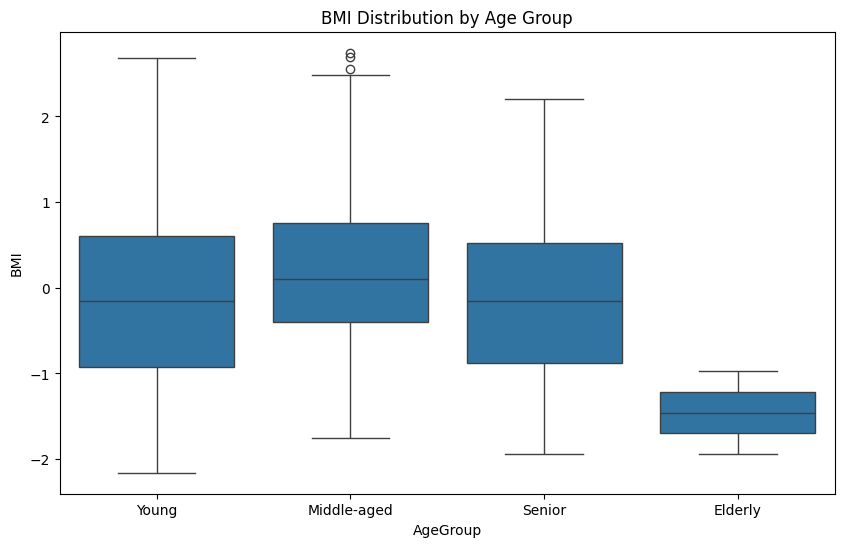

In [10]:
# Box plot of BMI by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='BMI')
plt.title('BMI Distribution by Age Group')
plt.show()